In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("../faults_memory.csv")
display(df)

,attempt,stop_addr,stop_fn,delay,target,bitflip,code
0,0,0x0800d504,prvAddNewTaskToReadyList,0.0080,0x20003fb6,4,0
1,1,0x0800c7e8,prvInitialiseNewTask,0.0098,0x2000197f,64,0
2,2,0x08014aae,vQueueWaitForMessageRestricted,0.0018,0x20003f0e,2,1
3,3,0x08014aaa,vQueueWaitForMessageRestricted,0.0044,0x20001fac,16,1
4,4,0x08014aae,vQueueWaitForMessageRestricted,0.0040,0x200045b1,1,1
...,...,...,...,...,...,...,...
7806,7852,0x0800dbae,prvIdleTask,1.5750,0x20005d61,1,0
7807,7853,0x0800deac,prvCheckTasksWaitingTermination,1.5802,0x20003ea5,1,0
7808,7854,0x0800dc84,prvIdleTask,1.5800,0x20000926,8,0
7809,7855,0x0800db6a,prvIdleTask,1.5772,0x20005b58,32,0


In [4]:
cfgv_functions = pd.read_csv('../compiled_cfgv_functions.csv')
eddi_functions = pd.read_csv('../compiled_eddi_functions.csv')
cfgv_functions.equals(eddi_functions) # we are compiling the exact same functions with both mechanisms

True

In [5]:
compiled_functions = cfgv_functions

In [6]:
sz_tot = df.shape[0]
df_errcodes = df.groupby('code')
sz_df_errcodes = df_errcodes.size()

In [7]:
num_crash = sz_df_errcodes[-1]      # crash     = -1
num_silent = sz_df_errcodes[-2]     # sdc       = -2
num_freeze = sz_df_errcodes[-3]     # froze     = -3 (stuck into an infinite loop)
num_detect = sz_df_errcodes[1]      # detect    =  1

tot_faults = num_crash + num_silent + num_freeze + num_detect

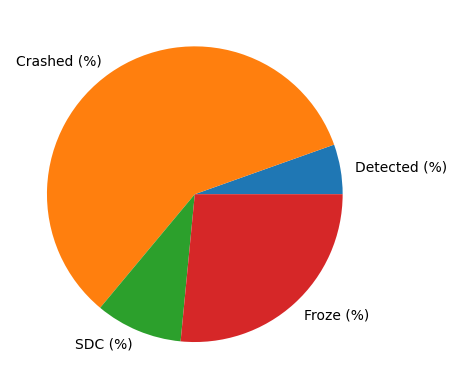

In [8]:
labels = 'Detected (%)','Crashed (%)','SDC (%)', 'Froze (%)'
plt.pie([num_detect/tot_faults, num_crash/tot_faults, num_silent/tot_faults, num_freeze/tot_faults], labels = labels)
plt.show()

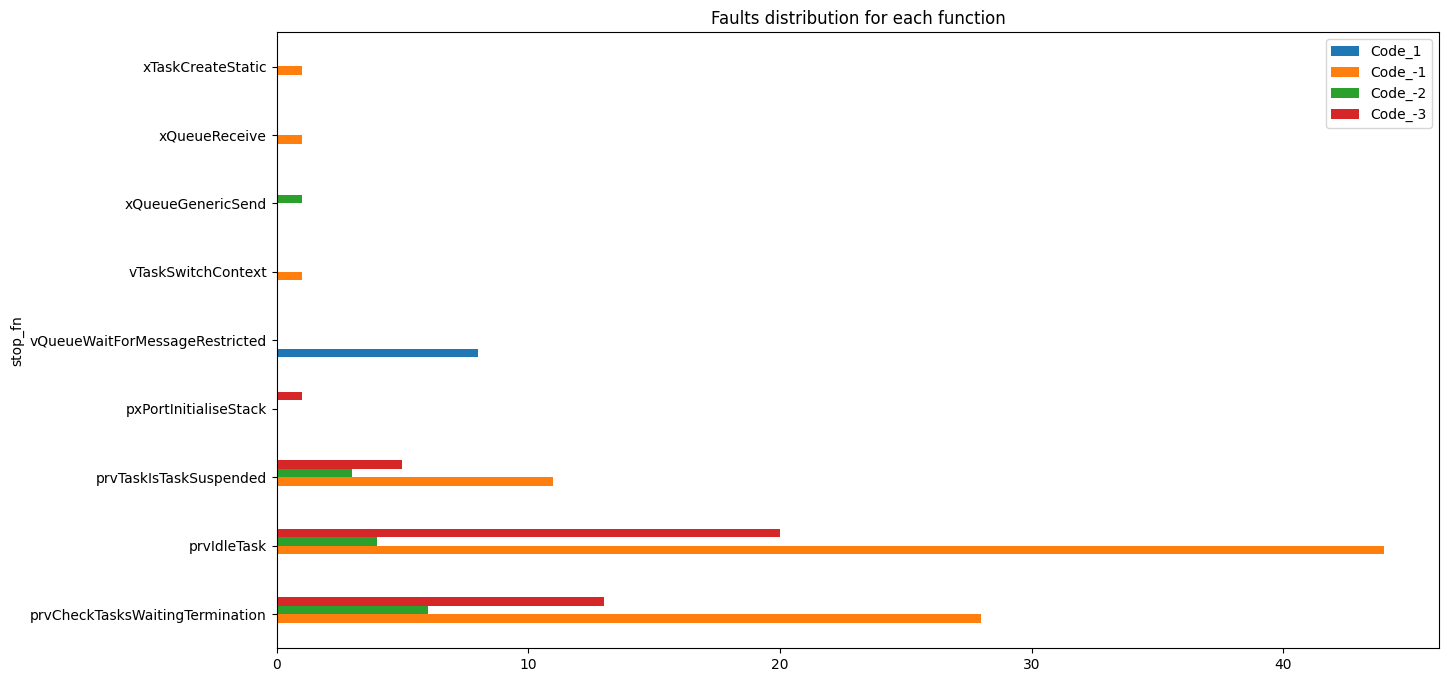

In [9]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,8),
                                  title = 'Faults distribution for each function',)

In [10]:
df['fn_name'] = df['stop_fn']
df = pd.merge(df, compiled_functions, on='fn_name')
df

,attempt,stop_addr,stop_fn,delay,target,bitflip,code,fn_name
0,0,0x0800d504,prvAddNewTaskToReadyList,0.0080,0x20003fb6,4,0,prvAddNewTaskToReadyList
1,272,0x0800d270,prvAddNewTaskToReadyList,0.0596,0x2000010f,1,0,prvAddNewTaskToReadyList
2,1750,0x0800d426,prvAddNewTaskToReadyList,0.3592,0x200015f9,128,0,prvAddNewTaskToReadyList
3,2751,0x0800d546,prvAddNewTaskToReadyList,0.5596,0x2000309e,2,0,prvAddNewTaskToReadyList
4,5250,0x0800d3aa,prvAddNewTaskToReadyList,1.0590,0x20004026,16,0,prvAddNewTaskToReadyList
...,...,...,...,...,...,...,...,...
7762,6025,0x08009cf4,vTaskStartScheduler,1.2104,0x20005c49,1,0,vTaskStartScheduler
7763,6048,0x08009cfe,vTaskStartScheduler,1.2102,0x20004b7f,128,0,vTaskStartScheduler
7764,6044,0x08002e46,vListInsertEnd,1.2090,0x20001686,8,0,vListInsertEnd
7765,7760,0x08003b48,fnTest1,1.5592,0x20001023,2,0,fnTest1


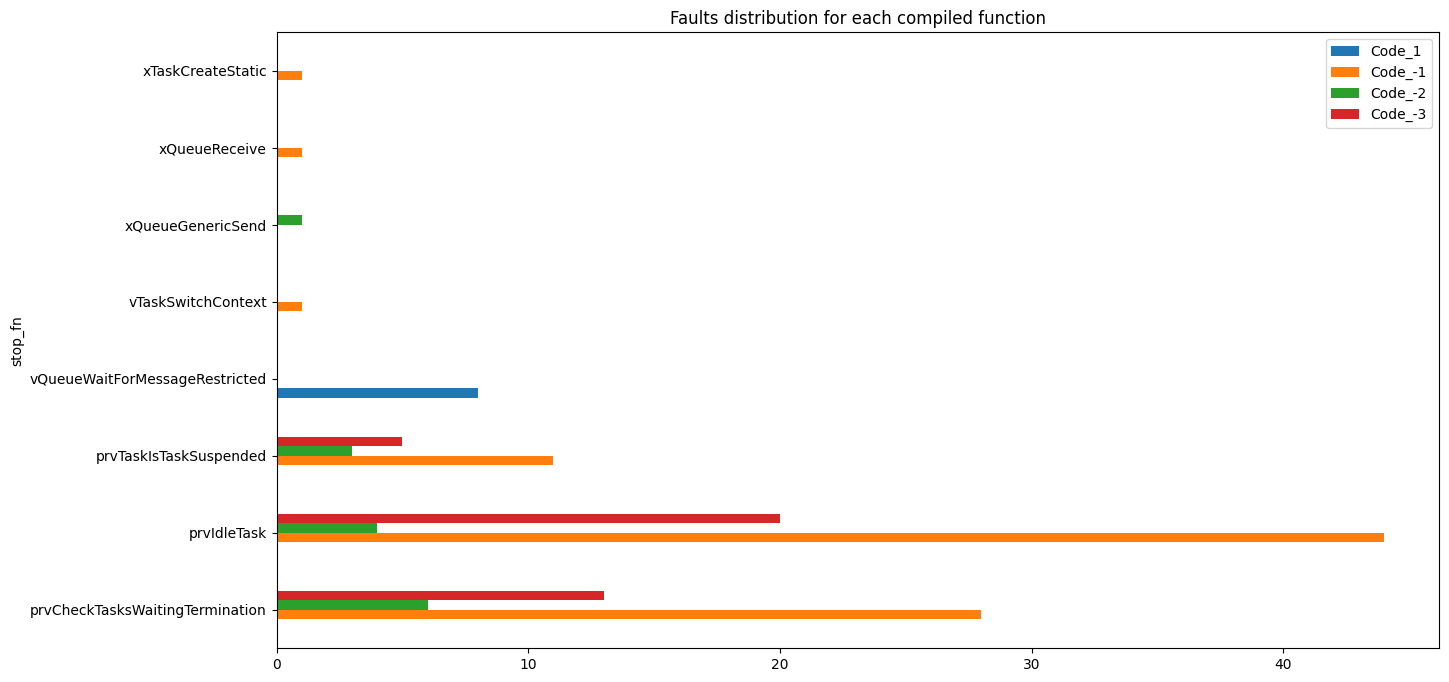

In [11]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,8),
                                  title = 'Faults distribution for each compiled function',)

<AxesSubplot: ylabel='stop_fn'>

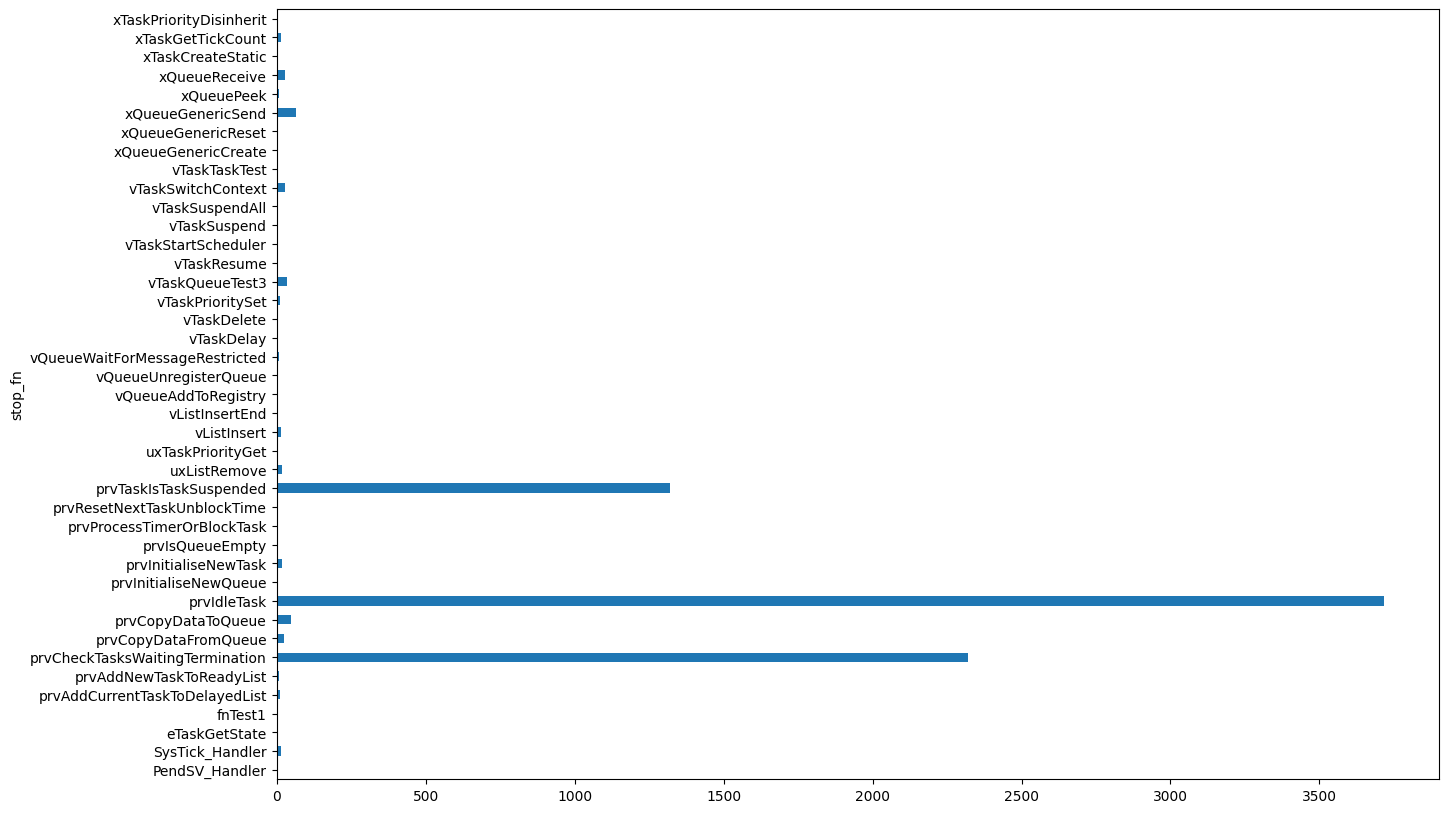